In [35]:
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'ace_tools'

## Initial plots of data

### Quick preprosseing steps

In [24]:
data = pd.read_csv('data_test/monthly_preprocessed_test.csv') 

In [25]:
data.head()

,id,eom,eom_ret,ret_ld1,tr_ld1,horizon,ret_ld2
0,10104,2010-01-31,2010-02-28,0.042934,0.042934,1,NaN
1,10104,2010-02-28,2010-03-31,0.007960,0.007960,1,NaN
2,10104,2010-03-31,2010-04-30,-0.127589,-0.127489,1,NaN
3,10104,2010-04-30,2010-05-31,-0.049307,-0.049207,1,NaN
4,10104,2010-05-31,2010-06-30,0.103772,0.103872,1,NaN


In [26]:
data.tail()

,id,eom,eom_ret,ret_ld1,tr_ld1,horizon,ret_ld2
57443,92655,2023-07-31,2023-08-31,NaN,0.062004,2,0.057504
57444,92655,2023-08-31,2023-09-30,NaN,0.032584,2,0.028084
57445,92655,2023-09-30,2023-10-31,NaN,-0.044489,2,-0.048789
57446,92655,2023-10-31,2023-11-30,NaN,0.004700,2,0.000000
57447,92655,2023-11-30,2023-12-31,NaN,0.004400,2,0.000000


In [27]:
print(data_filtered.dtypes)

id                  int64
eom        datetime64[ns]
eom_ret             int64
ret_ld1           float64
tr_ld1            float64
horizon             int64
ret_ld2           float64
dtype: object


In [ ]:
# Konverter 'eom_ret' til datetime
data["eom_ret"] = pd.to_datetime(data["eom_ret"])

# Filtrer data for horizon == 1
filtered_data = data[data["horizon"] == 1]

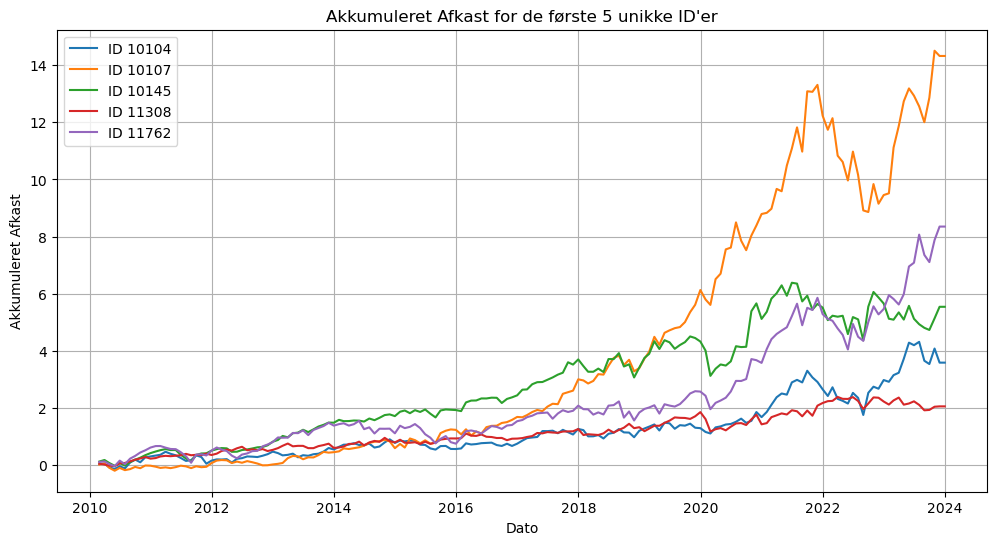

In [29]:
# Vælg de første 5 unikke id'er
unique_ids = filtered_data["id"].unique()[:5]

# Initialiser plot
plt.figure(figsize=(12, 6))

# Beregn og plot akkumulerede afkast for hver id
for uid in unique_ids:
    subset = filtered_data[filtered_data["id"] == uid].sort_values("eom_ret")
    subset["cum_ret"] = (1 + subset["ret_ld1"]).cumprod() - 1  # Akkumuleret afkast
    plt.plot(subset["eom_ret"], subset["cum_ret"], label=f"ID {uid}")

# Tilpas plot
plt.xlabel("Dato")
plt.ylabel("Akkumuleret Afkast")
plt.title("Akkumuleret Afkast for de første 5 unikke ID'er")
plt.legend()
plt.grid()

# Vis plot
plt.show()

## Plots of every stock

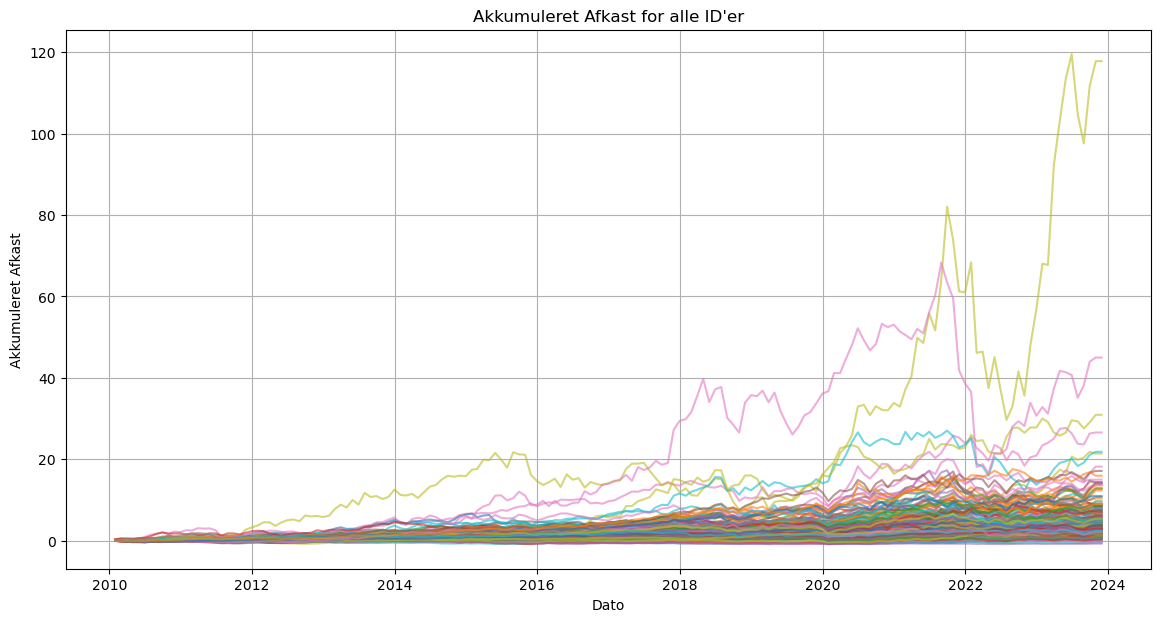

In [30]:
# Filtrer data for horizon == 1
filtered_data = data[data["horizon"] == 1]

# Initialiser plot
plt.figure(figsize=(14, 7))

# Loop gennem hver unik id og plot akkumuleret afkast
for uid in filtered_data["id"].unique():
    subset = filtered_data[filtered_data["id"] == uid].sort_values("eom")
    subset["cum_ret"] = (1 + subset["ret_ld1"]).cumprod() - 1  # Akkumuleret afkast
    plt.plot(subset["eom"], subset["cum_ret"], alpha=0.6)  # Tilføj gennemsigtighed for synlighed

# Tilpas plot
plt.xlabel("Dato")
plt.ylabel("Akkumuleret Afkast")
plt.title("Akkumuleret Afkast for alle ID'er")
plt.grid()
plt.show()


### Adding tickers

#### Plotting with tickers and names:

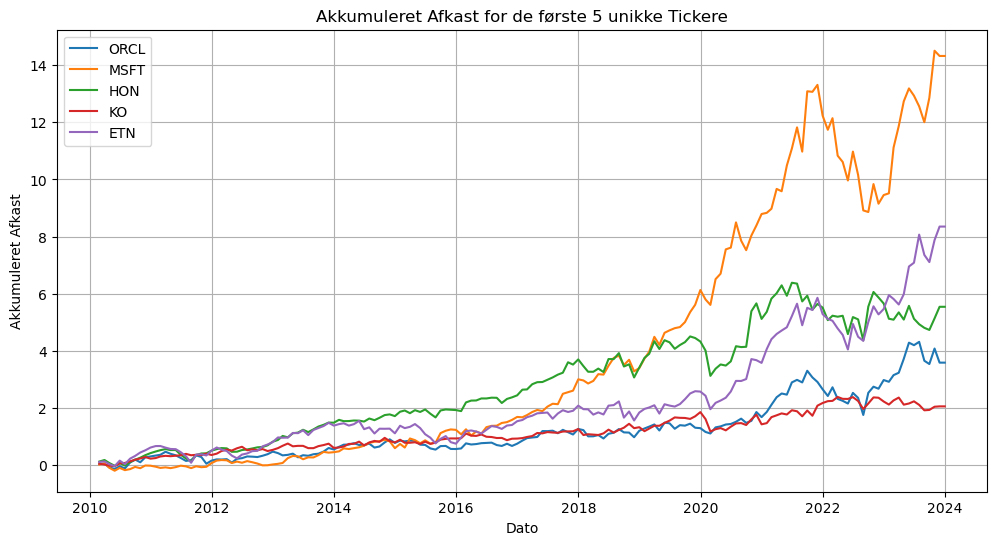

In [40]:
# Indlæs ID til Ticker mapping
ticker_map = pd.read_csv("Data/ticker_and_id.csv")  # Indlæs filen
ticker_dict = dict(zip(ticker_map["PERMNO"], ticker_map["TICKER"]))  # Omdan til dictionary

# Vælg de første 5 unikke id'er
unique_ids = filtered_data["id"].unique()[:5]

# Initialiser plot
plt.figure(figsize=(12, 6))

# Beregn og plot akkumulerede afkast for hver id
for uid in unique_ids:
    subset = filtered_data[filtered_data["id"] == uid].sort_values("eom_ret")
    subset["cum_ret"] = (1 + subset["ret_ld1"]).cumprod() - 1  # Akkumuleret afkast
    
    # Hent ticker fra mapping (brug ID hvis ingen match)
    ticker_label = ticker_dict.get(uid, f"ID {uid}")
    
    # Plot
    plt.plot(subset["eom_ret"], subset["cum_ret"], label=ticker_label)

# Tilpas plot
plt.xlabel("Dato")
plt.ylabel("Akkumuleret Afkast")
plt.title("Akkumuleret Afkast for de første 5 unikke Tickere")
plt.legend()
plt.grid()

# Vis plot
plt.show()

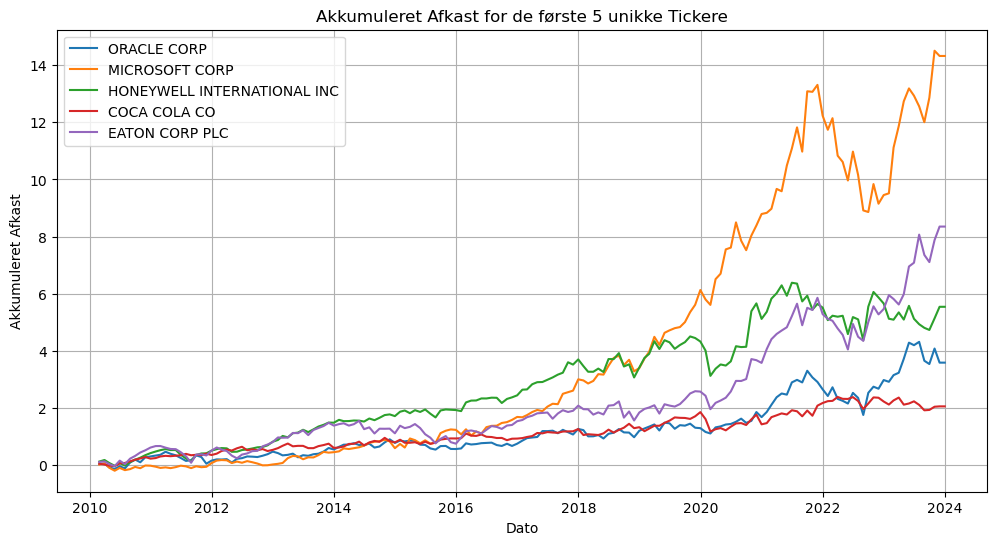

In [41]:
# Indlæs ID til Ticker mapping
ticker_map = pd.read_csv("Data/ticker_and_id.csv")  # Indlæs filen
ticker_dict = dict(zip(ticker_map["PERMNO"], ticker_map["COMNAM"]))  # Omdan til dictionary

# Vælg de første 5 unikke id'er
unique_ids = filtered_data["id"].unique()[:5]

# Initialiser plot
plt.figure(figsize=(12, 6))

# Beregn og plot akkumulerede afkast for hver id
for uid in unique_ids:
    subset = filtered_data[filtered_data["id"] == uid].sort_values("eom_ret")
    subset["cum_ret"] = (1 + subset["ret_ld1"]).cumprod() - 1  # Akkumuleret afkast
    
    # Hent ticker fra mapping (brug ID hvis ingen match)
    ticker_label = ticker_dict.get(uid, f"ID {uid}")
    
    # Plot
    plt.plot(subset["eom_ret"], subset["cum_ret"], label=ticker_label)

# Tilpas plot
plt.xlabel("Dato")
plt.ylabel("Akkumuleret Afkast")
plt.title("Akkumuleret Afkast for de første 5 unikke Tickere")
plt.legend()
plt.grid()

# Vis plot
plt.show()